In [1]:
import os
os.chdir("../")
import pandas as pd
import numpy as np
from fbprophet import Prophet
from data import *

/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [2]:
df = pd.read_csv('data/beijing_201802_201803_aq.csv')
bj_stations = list(df.groupby(by='stationId').size().index)

In [3]:
bj_stations

['aotizhongxin_aq',
 'badaling_aq',
 'beibuxinqu_aq',
 'daxing_aq',
 'dingling_aq',
 'donggaocun_aq',
 'dongsi_aq',
 'dongsihuan_aq',
 'fangshan_aq',
 'fengtaihuayuan_aq',
 'guanyuan_aq',
 'gucheng_aq',
 'huairou_aq',
 'liulihe_aq',
 'mentougou_aq',
 'miyun_aq',
 'miyunshuiku_aq',
 'nansanhuan_aq',
 'nongzhanguan_aq',
 'pingchang_aq',
 'pinggu_aq',
 'qianmen_aq',
 'shunyi_aq',
 'tiantan_aq',
 'tongzhou_aq',
 'wanliu_aq',
 'wanshouxigong_aq',
 'xizhimenbei_aq',
 'yanqin_aq',
 'yizhuang_aq',
 'yongdingmennei_aq',
 'yongledian_aq',
 'yufa_aq',
 'yungang_aq',
 'zhiwuyuan_aq']

In [4]:
df = pd.read_csv('results/sample_submission.csv')
ld_stations = list(set([x.split('#')[0] for x in list(df['test_id'])]) - set(bj_stations))
ld_stations

['CD9',
 'GR4',
 'HV1',
 'LW2',
 'KF1',
 'TH4',
 'GN3',
 'BL0',
 'MY7',
 'CD1',
 'GN0',
 'GR9',
 'ST5']

In [27]:
def predict(city='bj', metrics=['PM2.5'], station_names=['aotizhongxin_aq'],
            date_to_forc=pd.Timestamp('2018-05-02 00:00:00'), changepoint_prior_scale=10):
    df = airQualityData(city, date_to_forc - pd.Timedelta(7, unit='d'),
                        date_to_forc - pd.Timedelta(1, unit='h'))
    submit_df = pd.DataFrame()
    for station in station_names:
        df_station = pd.DataFrame()
        df_station['test_id'] = [station + '#' + str(i) for i in range(0, 48)]
        for metric in metrics:
            try:
                metric_df = df[df['station_id'] == station][['time', metric]]
                metric_df.columns = ['ds', 'y']
                metric_df = metric_df.reset_index(drop=True)
                metric_df['y'] = np.log(metric_df['y'])

                #metric_df['cap'] = 500 if metric == 'PM2.5' else 1000
                #metric_df['floor'] = 10
                m = Prophet(#growth='logistic', # default: linear
                            yearly_seasonality=False, weekly_seasonality=False, daily_seasonality='auto',
                            #seasonality_prior_scale=0.1, # no use if all seasonality set to False
                            changepoint_prior_scale=changepoint_prior_scale)
                m.fit(metric_df)
                future = m.make_future_dataframe(periods=72, freq='H', include_history=True)
                #future['cap'] = 500 if metric == 'PM2.5' else 1000
                #future['floor'] = 10
                forecast = m.predict(future)
                plt = m.plot(forecast)
                plt.show()
                forecast = forecast[(forecast['ds'] >= date_to_forc)
                                    & (forecast['ds'] < date_to_forc + pd.Timedelta(2, unit='d'))]
    #             print(forecast)
                df_station[metric] = list(np.exp(forecast['yhat']))
    #             print(df_station)
            except:
                df_station[metric] = list(np.random.random((48)) * 50)
        submit_df = pd.concat([submit_df, df_station])
    return submit_df

/anaconda3/envs/python36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


,test_id,PM2.5,PM10,O3
0,aotizhongxin_aq#0,59.650063,431.721085,10.224017
1,aotizhongxin_aq#1,67.483122,519.450328,24.947267
2,aotizhongxin_aq#2,72.667417,529.645966,45.812817
3,aotizhongxin_aq#3,70.109779,478.053214,61.431848
4,aotizhongxin_aq#4,59.598547,402.890619,69.148787
5,aotizhongxin_aq#5,47.177277,326.273861,74.805155
6,aotizhongxin_aq#6,38.134081,257.083025,79.843981
7,aotizhongxin_aq#7,33.362649,202.340443,80.329621
8,aotizhongxin_aq#8,31.048446,167.032857,74.992872
9,aotizhongxin_aq#9,28.781382,150.791869,68.472522


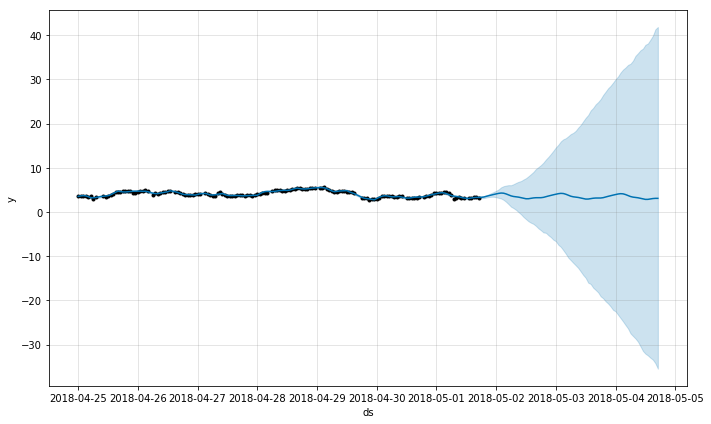

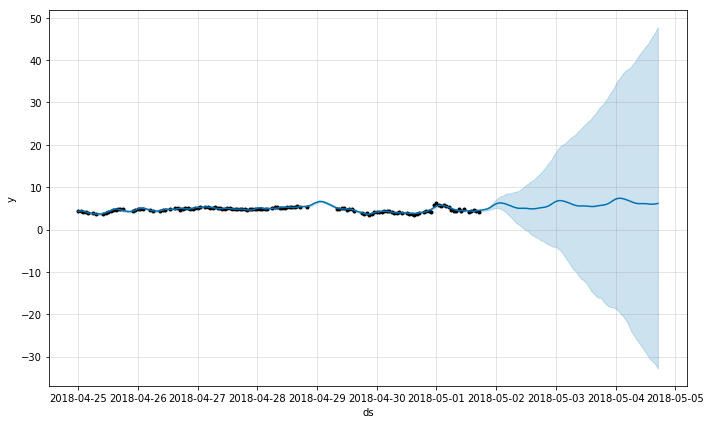

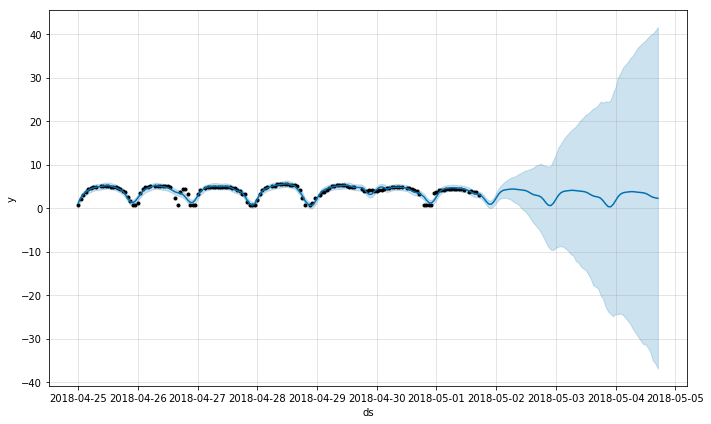

In [31]:
predict('bj', ['PM2.5', 'PM10', 'O3'], [bj_stations[0]], changepoint_prior_scale=10)

In [7]:
bj_pred = predict('bj', ['PM2.5', 'PM10', 'O3'], bj_stations)

/anaconda3/envs/python36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [8]:
bj_pred

,test_id,PM2.5,PM10,O3
0,aotizhongxin_aq#0,59.650063,431.721085,10.224017
1,aotizhongxin_aq#1,67.483122,519.450328,24.947267
2,aotizhongxin_aq#2,72.667417,529.645966,45.812817
3,aotizhongxin_aq#3,70.109779,478.053214,61.431848
4,aotizhongxin_aq#4,59.598547,402.890619,69.148787
5,aotizhongxin_aq#5,47.177277,326.273861,74.805155
6,aotizhongxin_aq#6,38.134081,257.083025,79.843981
7,aotizhongxin_aq#7,33.362649,202.340443,80.329621
8,aotizhongxin_aq#8,31.048446,167.032857,74.992872
9,aotizhongxin_aq#9,28.781382,150.791869,68.472522


In [98]:
bj_pred.to_csv('bj_pred.csv', index=None)

In [9]:
ld_pred = predict('ld', ['PM2.5', 'PM10'], ld_stations)

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/anaconda3/envs/python36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 20.0.


In [10]:
ld_pred

,test_id,PM2.5,PM10
0,CD9#0,3.085977,7.510832
1,CD9#1,23.949548,7.016755
2,CD9#2,19.516985,46.236520
3,CD9#3,29.489454,10.580871
4,CD9#4,46.623760,19.076691
5,CD9#5,28.166170,11.706181
6,CD9#6,12.401919,33.876961
7,CD9#7,12.738847,7.658348
8,CD9#8,46.581260,12.596702
9,CD9#9,15.763276,41.054195


In [101]:
ld_pred.to_csv('ld_pred.csv', index=None)

In [11]:
df = pd.concat([bj_pred, ld_pred])

In [12]:
submit = df.reindex(columns=['test_id', 'PM2.5', 'PM10', 'O3'])

In [14]:
submit.to_csv('results/submit_0502.csv', index=None)